In [385]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

import gtd2d.plotter.plotter as plot
import pickle
from scipy.spatial.transform import Rotation as R


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [430]:
path = "C:/Users/schiavaz/lava-nc/depth/"
dataset = "data/esim_data/curvy/"

In [431]:
with open(path + dataset + 'results/result.pkl', 'rb') as f:
    out = pickle.load(f)

In [432]:
with open(path + dataset + 'results/result_python.pkl', 'rb') as f:
    out_python = pickle.load(f)

In [433]:
results_python = plot.Plotter(out_python, base_path=path + dataset)
print(results_python.raw_depths.shape)

(1000, 180, 240)


In [434]:
results_lava = plot.Plotter(out, base_path=path + dataset)
# print(results_lava.raw_depths.shape)

In [435]:
flow_m_python = np.sqrt(np.square(results_python.flow_u) + np.square(results_python.flow_v))

In [436]:
flow_m_python = flow_m_python[flow_m_python != 0.0]

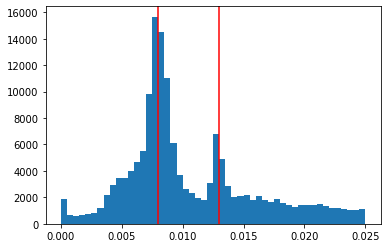

In [437]:
plt.hist(flow_m_python.flatten(), 50, range=(0, 0.025));
plt.axvline(0.013, c="red")
plt.axvline(0.008, c="red")

In [438]:
flow_lava_u = [s.toarray() for s in results_lava.flow_u]
flow_lava_v = [s.toarray() for s in results_lava.flow_v]

In [439]:
flow_m_lava = np.sqrt(np.square(flow_lava_u) + np.square(flow_lava_v))
flow_m_lava = flow_m_lava[flow_m_lava != 0.0]

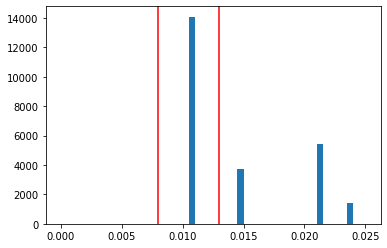

In [440]:
plt.hist(flow_m_lava.flatten(), 50, range=(0, 0.025));
plt.axvline(0.013, c="red")
plt.axvline(0.008, c="red")

In [441]:
shape = (180, 240)
center_x = 120
center_y = 90
m = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
xs = m[0] - center_x
ys = np.flip(m[1]) - center_y

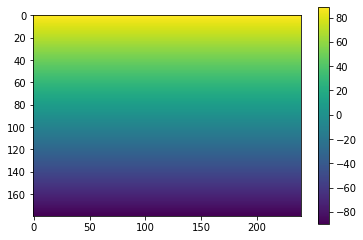

In [95]:
b = plt.imshow(ys)
plt.colorbar(b)

In [96]:
f_py_u, f_py_v = results_python.get_frame_flow(200, 300)

In [97]:
f_lava_u, f_lava_v = results_lava.get_frame_flow(200, 300)

In [98]:
f_py_m = np.sqrt(np.square(f_py_u) + np.square(f_py_v))
f_py_m[f_py_m == 0] = np.nan
f_lava_m = np.sqrt(np.square(f_lava_u) + np.square(f_lava_v))
f_lava_m[f_lava_m == 0] = np.nan

TypeError: 'numpy.float64' object does not support item assignment

TypeError: Invalid shape () for image data

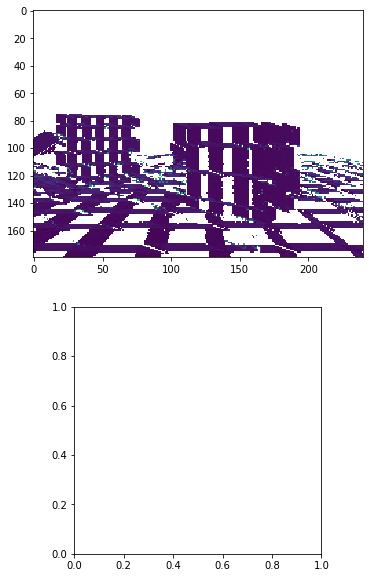

In [99]:
fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].imshow(f_py_m, interpolation="none")
axs[1].imshow(f_lava_m, interpolation="none")

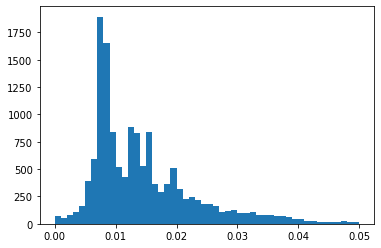

In [19]:
plt.hist(f_py_m.flatten(), 50, range=(0, 0.05));

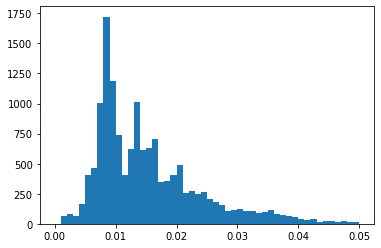

In [20]:
plt.hist(f_lava_m.flatten(), 50, range=(0, 0.05));

In [21]:
d_python = f_py_u * (-185) + f_py_v * 76
d_python[d_python <= 0] = np.nan

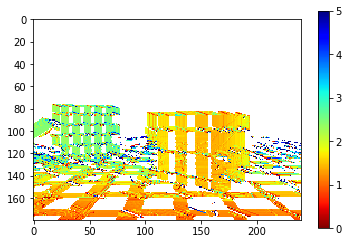

In [22]:
b = plt.imshow(d_python, interpolation="none", cmap="jet_r", vmin=0, vmax=5)
plt.colorbar(b)

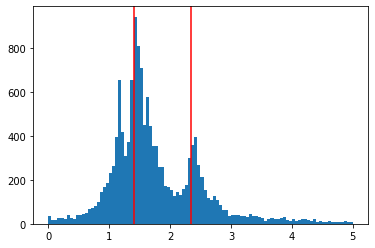

In [23]:
plt.hist(d_python.flatten(), 100, range=(0, 5));
plt.axvline(1.4, c="red")
plt.axvline(2.35, c="red")

In [24]:
d_lava = f_lava_u * (-185) + f_lava_v * 76
# d_lava[d_lava <= 0] = np.nan

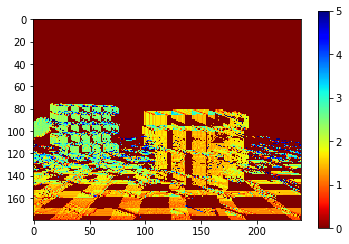

In [25]:
b = plt.imshow(d_lava, interpolation="none", cmap="jet_r", vmin=0, vmax=5)
plt.colorbar(b)

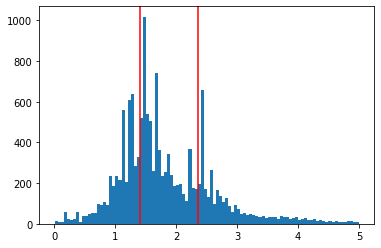

In [26]:
plt.hist(d_lava.flatten(), 100, range=(0.001, 5));
plt.axvline(1.4, c="red")
plt.axvline(2.35, c="red")

In [27]:
py_vals_u, py_vals_v = results_python.get_all_values_flow()

py_vals_m = py_vals_u * (-185) + py_vals_v * 76

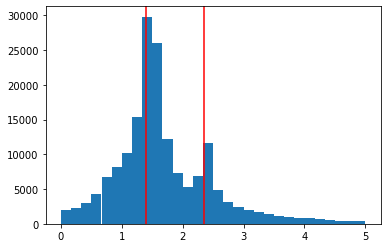

In [28]:
plt.hist(py_vals_m.flatten(), 30, range=(0.001, 5));
plt.axvline(1.4, c="red")
plt.axvline(2.35, c="red")

In [29]:
lava_vals_u, lava_vals_v = results_lava.get_all_values_flow()

In [30]:
lava_vals_m = np.around(np.around(lava_vals_u, 3) * (-185) + np.around(lava_vals_v, 3) * 76, 3)
lava_vals_m[lava_vals_m == 0.0] = np.nan

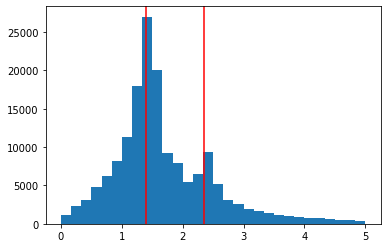

In [31]:
plt.hist(lava_vals_m.flatten(), 30, range=(0, 5));
plt.axvline(1.4, c="red")
plt.axvline(2.35, c="red")

In [442]:
py_d_vals = results_python.get_all_values("raw")

KeyboardInterrupt: 

In [ ]:
plt.hist(py_d_vals, 30, range=(0, 5));
plt.axvline(1.4, c="red")
plt.axvline(2.35, c="red")

In [443]:
lava_d_vals = results_lava.get_all_values("raw")

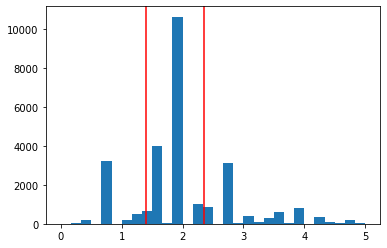

In [444]:
plt.hist(lava_d_vals, 30, range=(0, 5));
plt.axvline(1.4, c="red")
plt.axvline(2.35, c="red")

In [445]:
def gen_cam_input_data(events, poses, timesteps):

    t_start = events[0, 0]
    duration = events[-1, 0] - events[0, 0]

    velocities_buffer = np.zeros((3, timesteps))

    for i in range(timesteps):
        curr_time = t_start + (duration / timesteps) * i

        vel = vel_at_time(poses, curr_time)
        velocities_buffer[:, i] = vel[1:4]

    return velocities_buffer

def vel_at_time(poses, time):
    """Get the camera velocity at the specified time"""
    idx = np.searchsorted(poses[:, 0], time)
    if idx != 0:
        idx += 1

    pose_start = poses[idx]
    pose_end = poses[idx + 1]

    # translational position difference
    t1 = pose_start[1:4]
    t2 = pose_end[1:4]
    t_vel = (t2 - t1) / (pose_end[0] - pose_start[0])

    # angular position difference
    ang1 = R.from_quat(pose_start[4:]).as_euler("xyz")
    ang2 = R.from_quat(pose_end[4:]).as_euler("xyz")
    a_vel = (ang2 - ang1) / (pose_end[0] - pose_start[0])

    return np.array([time, t_vel[0], t_vel[1], t_vel[2], a_vel[0], a_vel[1], a_vel[2]])

def filter_time(events, t_start, t_end):
    id_start = np.searchsorted(events[:, 0], t_start)
    id_end = np.searchsorted(events[:, 0], t_end)

    return events[id_start:id_end, :]

In [446]:
events = np.loadtxt(path + dataset + "events.txt")
times = out["times"]
events = filter_time(events, times[0], times[-1])
times.shape

(19,)

In [447]:
poses = np.loadtxt(path + dataset + "groundtruth.txt")

In [448]:
vel_buffer = gen_cam_input_data(events, poses, 20)

In [449]:
vel_buffer = vel_buffer.transpose()

In [450]:
vel_buffer[:,[0, 1, 2]] = vel_buffer[:,[1, 2, 0]]
vel_buffer[0]

array([ 0.92877263, -0.38328293,  0.        ])

In [451]:
vel_buffer = vel_buffer[:-2]
vel_buffer.shape

(18, 3)

In [452]:
py_vals_u, py_vals_v = results_python.get_all_values_flow()

py_vals_u = py_vals_u[:-1]
py_vals_v = py_vals_v[:-1]

In [453]:
py_vals_u.shape

(998, 180, 240)

In [454]:
lava_vals_u, lava_vals_v = results_lava.get_all_values_flow()

In [455]:
lava_vals_u.shape

(18, 180, 240)

In [456]:
def get_translational_flow(t, f, C, shape):
    u_flow = np.zeros(shape)
    v_flow = np.zeros(shape)
    for x in range(u_flow.shape[1]):
        for y in range(u_flow.shape[0]):
            # shift coordinates to be centered
            xi = x - C[0]
            yi = np.abs(y - u_flow.shape[0] +1) - C[1]

            # compute image flow
            m = np.array([
                [-f, 0, xi],
                [0, -f, yi]
            ])
            r = m @ t

            u_flow[y, x] = r[0]  # x flow
            v_flow[y, x] = r[1]  # y flow

    return u_flow, v_flow

In [457]:
pred_u = np.zeros((18, 180, 240))
pred_v = np.zeros((18, 180, 240))

In [458]:
for i, v in enumerate(vel_buffer):
    pred_u[i], pred_v[i] = get_translational_flow(v, 200.0, (120, 90), (180, 240))

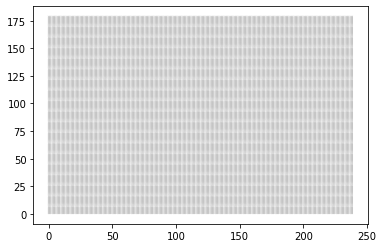

In [459]:
plt.quiver(pred_u[10], pred_v[10])

In [460]:
pred_u[0]

array([[-185.75452538, -185.75452538, -185.75452538, ..., -185.75452538,
        -185.75452538, -185.75452538],
       [-185.75452538, -185.75452538, -185.75452538, ..., -185.75452538,
        -185.75452538, -185.75452538],
       [-185.75452538, -185.75452538, -185.75452538, ..., -185.75452538,
        -185.75452538, -185.75452538],
       ...,
       [-185.75452538, -185.75452538, -185.75452538, ..., -185.75452538,
        -185.75452538, -185.75452538],
       [-185.75452538, -185.75452538, -185.75452538, ..., -185.75452538,
        -185.75452538, -185.75452538],
       [-185.75452538, -185.75452538, -185.75452538, ..., -185.75452538,
        -185.75452538, -185.75452538]])

In [461]:
pred_v[0]

array([[76.65658555, 76.65658555, 76.65658555, ..., 76.65658555,
        76.65658555, 76.65658555],
       [76.65658555, 76.65658555, 76.65658555, ..., 76.65658555,
        76.65658555, 76.65658555],
       [76.65658555, 76.65658555, 76.65658555, ..., 76.65658555,
        76.65658555, 76.65658555],
       ...,
       [76.65658555, 76.65658555, 76.65658555, ..., 76.65658555,
        76.65658555, 76.65658555],
       [76.65658555, 76.65658555, 76.65658555, ..., 76.65658555,
        76.65658555, 76.65658555],
       [76.65658555, 76.65658555, 76.65658555, ..., 76.65658555,
        76.65658555, 76.65658555]])

In [462]:
pred_u.shape

(18, 180, 240)

In [463]:
py_depths = py_vals_u * pred_u + py_vals_v * pred_v

ValueError: operands could not be broadcast together with shapes (998,180,240) (18,180,240) 

In [464]:
lava_depths = lava_vals_u * pred_u + lava_vals_v * pred_v

In [465]:
py_depths[py_depths == 0.0] = np.nan
lava_depths[lava_depths == 0.0] = np.nan

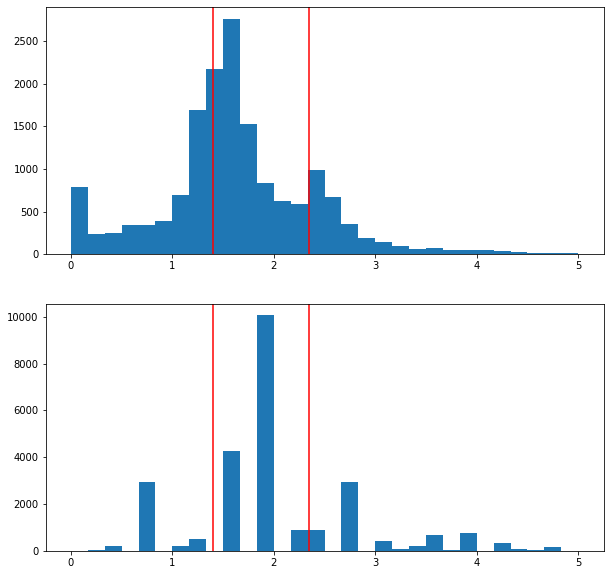

In [466]:
fig, axs = plt.subplots(2, figsize=(10, 10))
axs[0].hist(py_depths.flatten(), 30, range=(0, 5));
axs[0].axvline(1.4, c="red")
axs[0].axvline(2.35, c="red")
axs[1].hist(lava_depths.flatten(), 30, range=(0, 5));
axs[1].axvline(1.4, c="red")
axs[1].axvline(2.35, c="red")

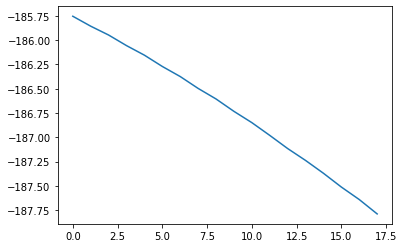

In [467]:
plt.plot(pred_u.mean(axis=(1, 2)))

In [468]:
cam_x_lava = out["cam_x"]
cam_y_lava = out["cam_y"]

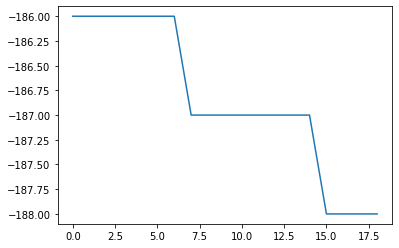

In [469]:
plt.plot(cam_x_lava.mean(axis=(0, 1)))

In [470]:
cam_y_lava.shape

(180, 240, 19)

In [471]:
cam_x_python = out_python["cam_x"]
cam_y_python = out_python["cam_y"]

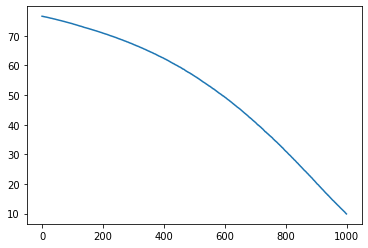

In [472]:
plt.plot(cam_y_python.mean(axis=(1, 2)))

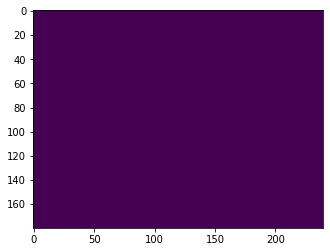

In [473]:
plt.imshow(cam_x_lava[...,0])

In [474]:
cam_x_lava[...,0]

array([[-186., -186., -186., ..., -186., -186., -186.],
       [-186., -186., -186., ..., -186., -186., -186.],
       [-186., -186., -186., ..., -186., -186., -186.],
       ...,
       [-186., -186., -186., ..., -186., -186., -186.],
       [-186., -186., -186., ..., -186., -186., -186.],
       [-186., -186., -186., ..., -186., -186., -186.]])

In [475]:
cam_x_python[0]

array([[-185.76386518, -185.76386518, -185.76386518, ..., -185.76386518,
        -185.76386518, -185.76386518],
       [-185.76386518, -185.76386518, -185.76386518, ..., -185.76386518,
        -185.76386518, -185.76386518],
       [-185.76386518, -185.76386518, -185.76386518, ..., -185.76386518,
        -185.76386518, -185.76386518],
       ...,
       [-185.76386518, -185.76386518, -185.76386518, ..., -185.76386518,
        -185.76386518, -185.76386518],
       [-185.76386518, -185.76386518, -185.76386518, ..., -185.76386518,
        -185.76386518, -185.76386518],
       [-185.76386518, -185.76386518, -185.76386518, ..., -185.76386518,
        -185.76386518, -185.76386518]])

In [476]:
out["cfg"]

{'use_lava': True,
 'lava_floating': False,
 'base_path': 'C:/Users/schiavaz/lava-nc/depth/data/esim_data/curvy/',
 'events_path': 'C:/Users/schiavaz/lava-nc/depth/data/esim_data/curvy/events.txt',
 'poses_path': 'C:/Users/schiavaz/lava-nc/depth/data/esim_data/curvy/groundtruth.txt',
 'calib_path': 'C:/Users/schiavaz/lava-nc/depth/data/esim_data/curvy/calib.txt',
 'output_path': 'C:/Users/schiavaz/lava-nc/depth/data/esim_data/curvy/results/result.pkl',
 'shift_axes': True,
 'dvs_shape': [180, 240],
 'time_range': [2.5, 2.7],
 'timesteps_second': 100,
 'refractory_period': 0.1,
 'subsampling_factor': 1,
 'conv_stride': [1, 1],
 'conv_shape': [1, 1],
 'thresh_conv': 0.5,
 'avg_thresh': 200,
 'avg_shape': [5, 5],
 'avg_min_meas': 5,
 'avg_alpha': 0.25,
 'chunk_size': 10000}